In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
% matplotlib inline

# Importing the dataset

In [2]:
df_regions = pd.read_csv('df_regions.csv')

In [3]:
df_regions.head()

,region,sum_injuries,male_injuries,female_injuries,urban_injuries,suburban_injuries,injuries_0_18,injuries_18_30,injuries_30_40,injuries_40_50,...,cause_illegal_parking_stop,cause_illegal_turn,cause_illegal_crossing,cause_traffic_light_break,cause_speeding,cause_drug_use,cause_other,injuries_total,dead_total,intact_total
0,Al-Baha,935.0,816.0,119.0,431.0,504.0,192.0,417.0,219.0,62.0,...,22.0,28.0,57.0,11.0,513.0,1.0,1132.0,935.0,111.0,2872.0
1,Al-Jouf,314.0,266.0,48.0,90.0,224.0,59.0,107.0,96.0,47.0,...,82.0,58.0,58.0,51.0,612.0,1.0,2790.0,314.0,102.0,6470.0
2,Al-Qurayyat,304.0,271.0,33.0,134.0,170.0,73.0,131.0,63.0,17.0,...,2.0,357.0,673.0,4.0,1020.0,0.0,1647.0,304.0,55.0,7120.0
3,Ar Riyad,4554.0,3979.0,575.0,3094.0,1460.0,931.0,1264.0,1192.0,788.0,...,14468.0,13284.0,14801.0,13944.0,23087.0,0.0,300.0,4554.0,1091.0,157527.0
4,Aseer,2192.0,1858.0,334.0,213.0,1979.0,541.0,875.0,436.0,166.0,...,1170.0,801.0,1644.0,113.0,15159.0,0.0,7077.0,2192.0,696.0,47197.0


# Plotting

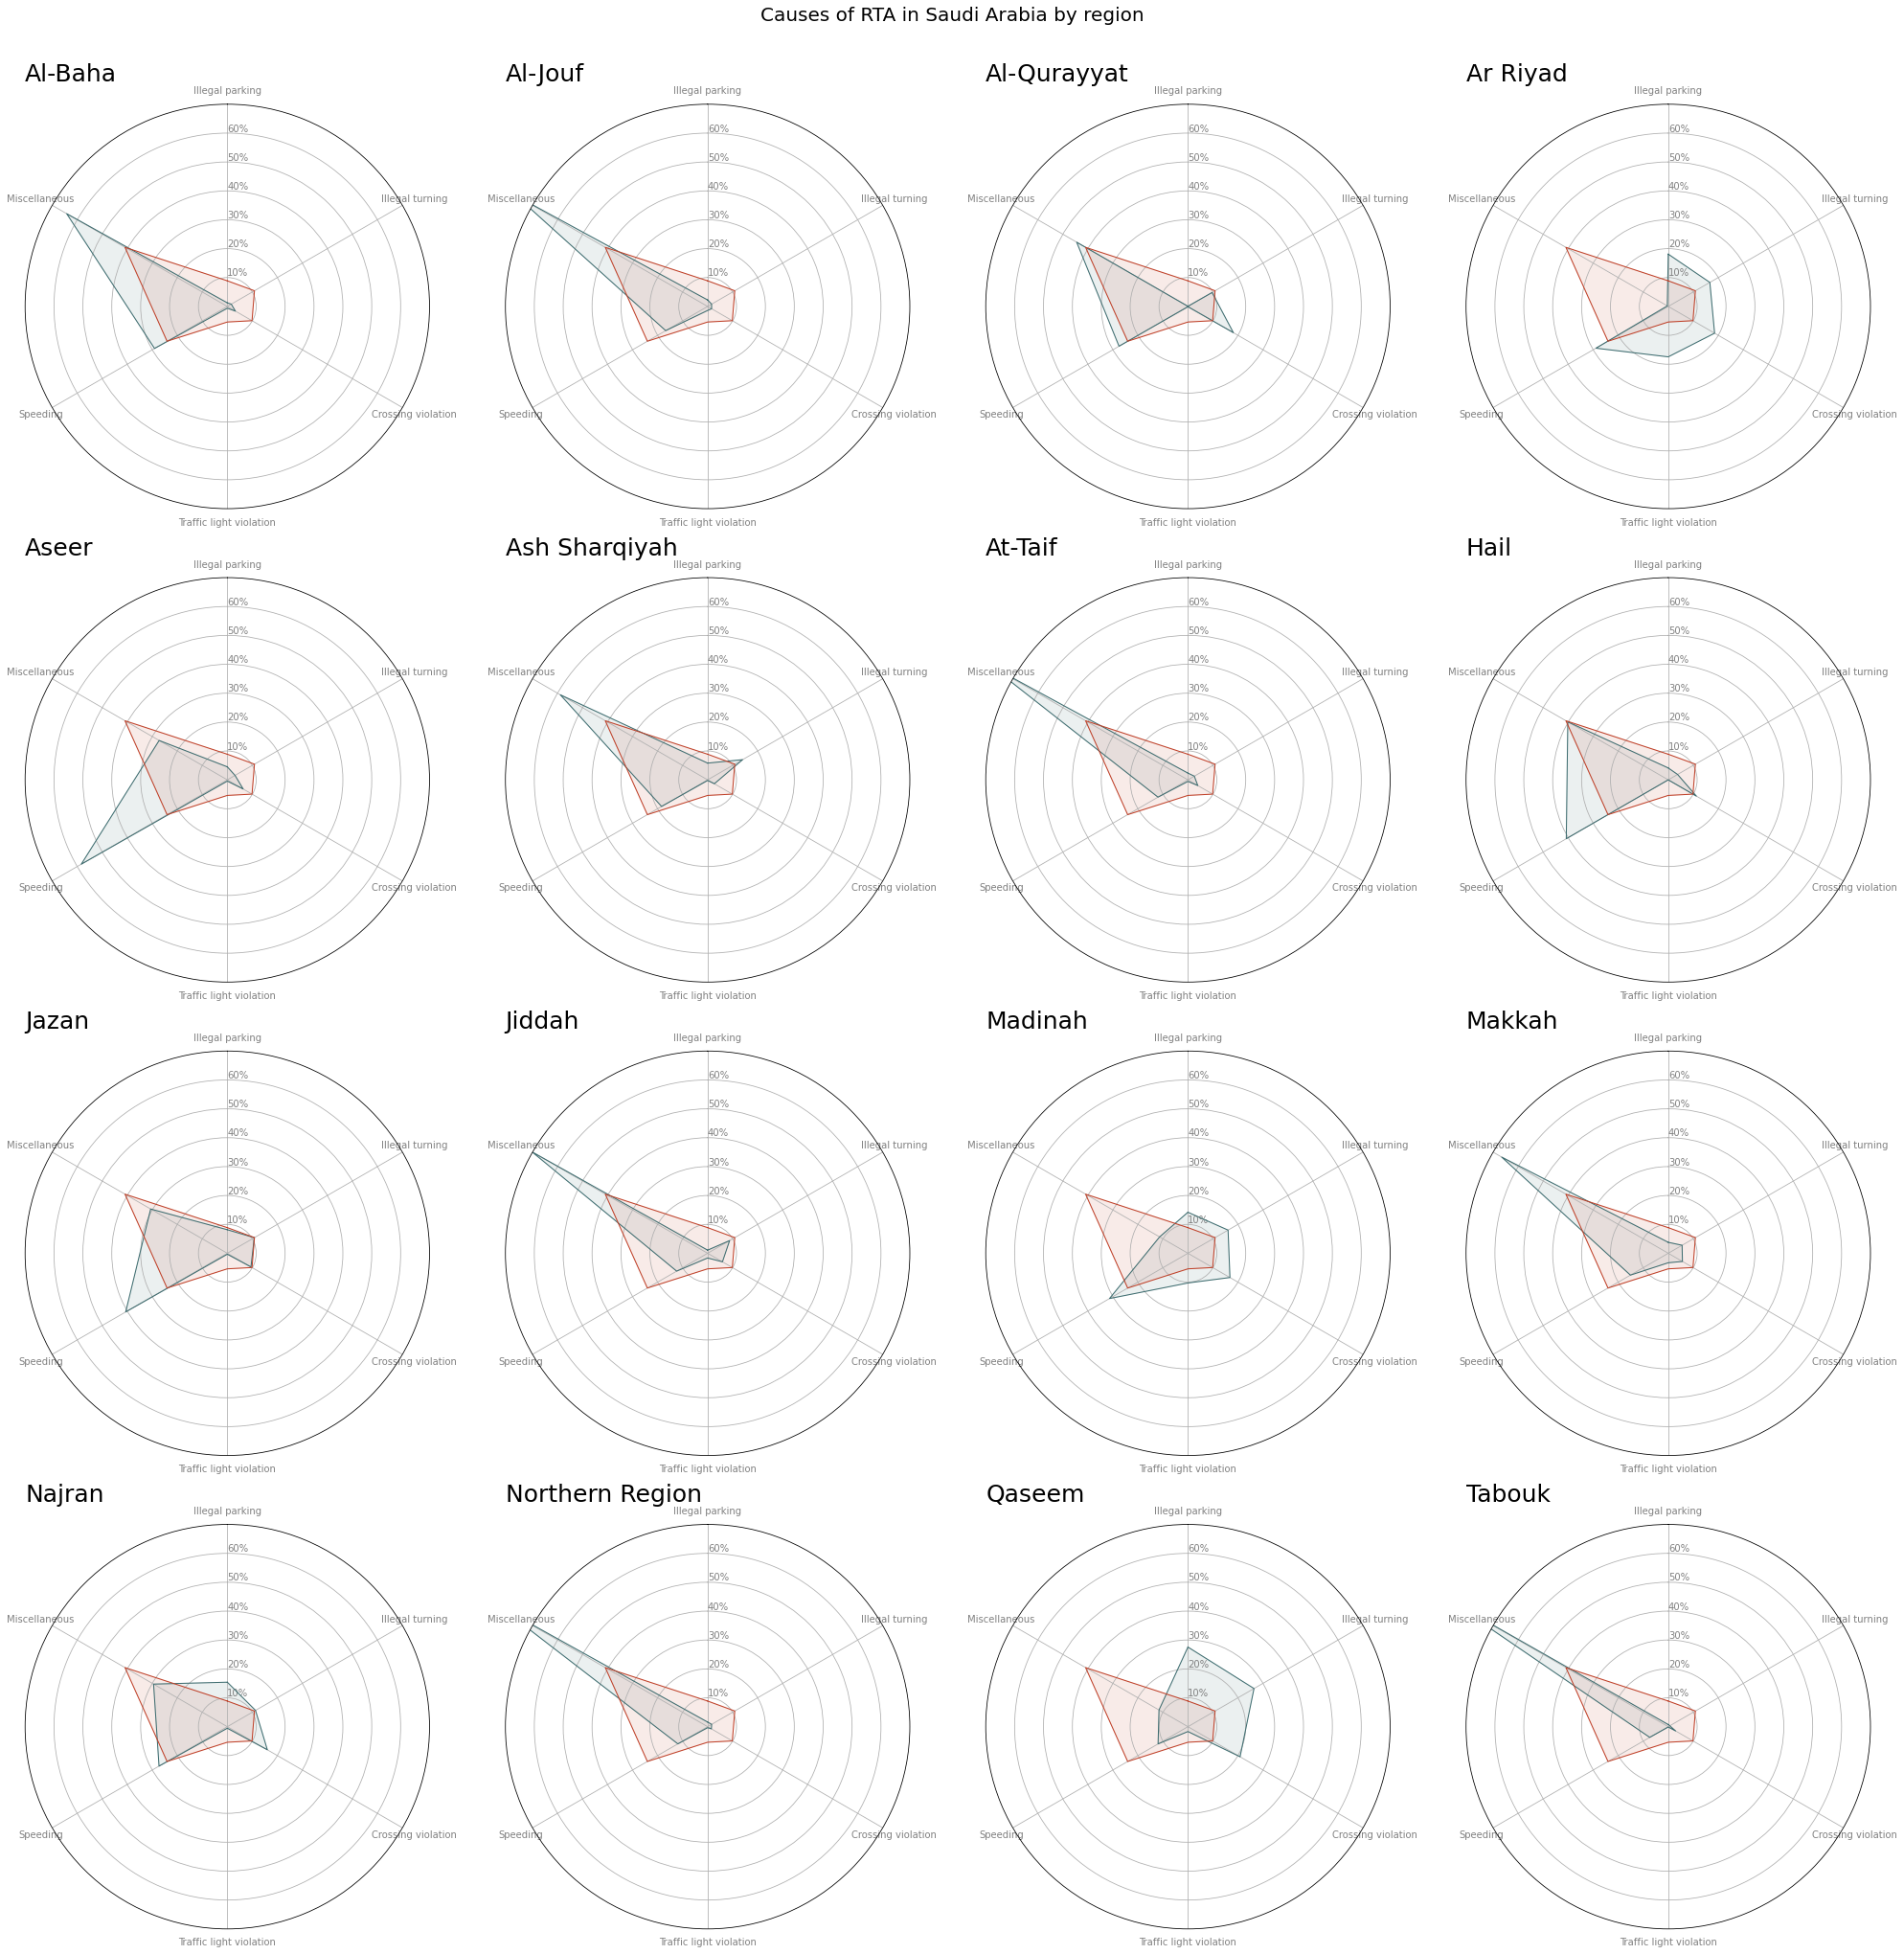

In [4]:
#preparing the dataframe
subset = df_regions[['region','cause_illegal_parking_stop',
       'cause_illegal_turn', 'cause_illegal_crossing',
       'cause_traffic_light_break', 'cause_speeding',
       'cause_other']]


colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']

def make_spider(row,title):
    #Preparing the angles of the chart

    categories=list(subset)[1:]
    N = len(categories)
    [n / float(N) * 2 * np.pi for n in range(N)]
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    #intiate the plot
    ax = plt.subplot(4,4,row+1,polar = True)

    #this step is to start the first axis at an angle of 0
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)


    #setting up xticks
    plt.xticks(angles[:-1], ['Illegal parking', 'Illegal turning', 'Crossing violation',
                            'Traffic light violation','Speeding','Miscellaneous'], color='grey', size = 10)

    #setting the yticks
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6], ["10%","20%","30%","40%","50%","60%"], color="grey", size=10)
    plt.ylim(0,0.7)
    
    
    #plot the city
    values = (subset.loc[row].drop('region').values/(subset.loc[row].drop('region').values.sum())).flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = colors[0], label = 'Region')
    ax.fill(angles, values, color = colors[0], alpha=0.1)
    plt.title(label = title, size = 25, loc='left',va = 'top')

    #plot the national average
    values = (subset.sum().drop('region').values/(subset.sum().drop('region').values.sum())).flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Natoinal average', color = colors[-1])
    ax.fill(angles, values, color = colors[-1], alpha=0.1)
    
    #add the legend
    #ax.legend(ncol = 1, loc = 2, bbox_to_anchor=(-.02, 0.95, 1.0, .102))


plt.figure(figsize=(28,28),facecolor='w')
plt.suptitle('Causes of RTA in Saudi Arabia by region', fontsize=20, y = 1.01)


for row in range(0,len(subset.index)):
    make_spider(row=row, title = subset['region'][row])


plt.tight_layout(pad = 1)
#plt.savefig('./output/new_Causes of RTA_with title.jpg', dpi = 150)

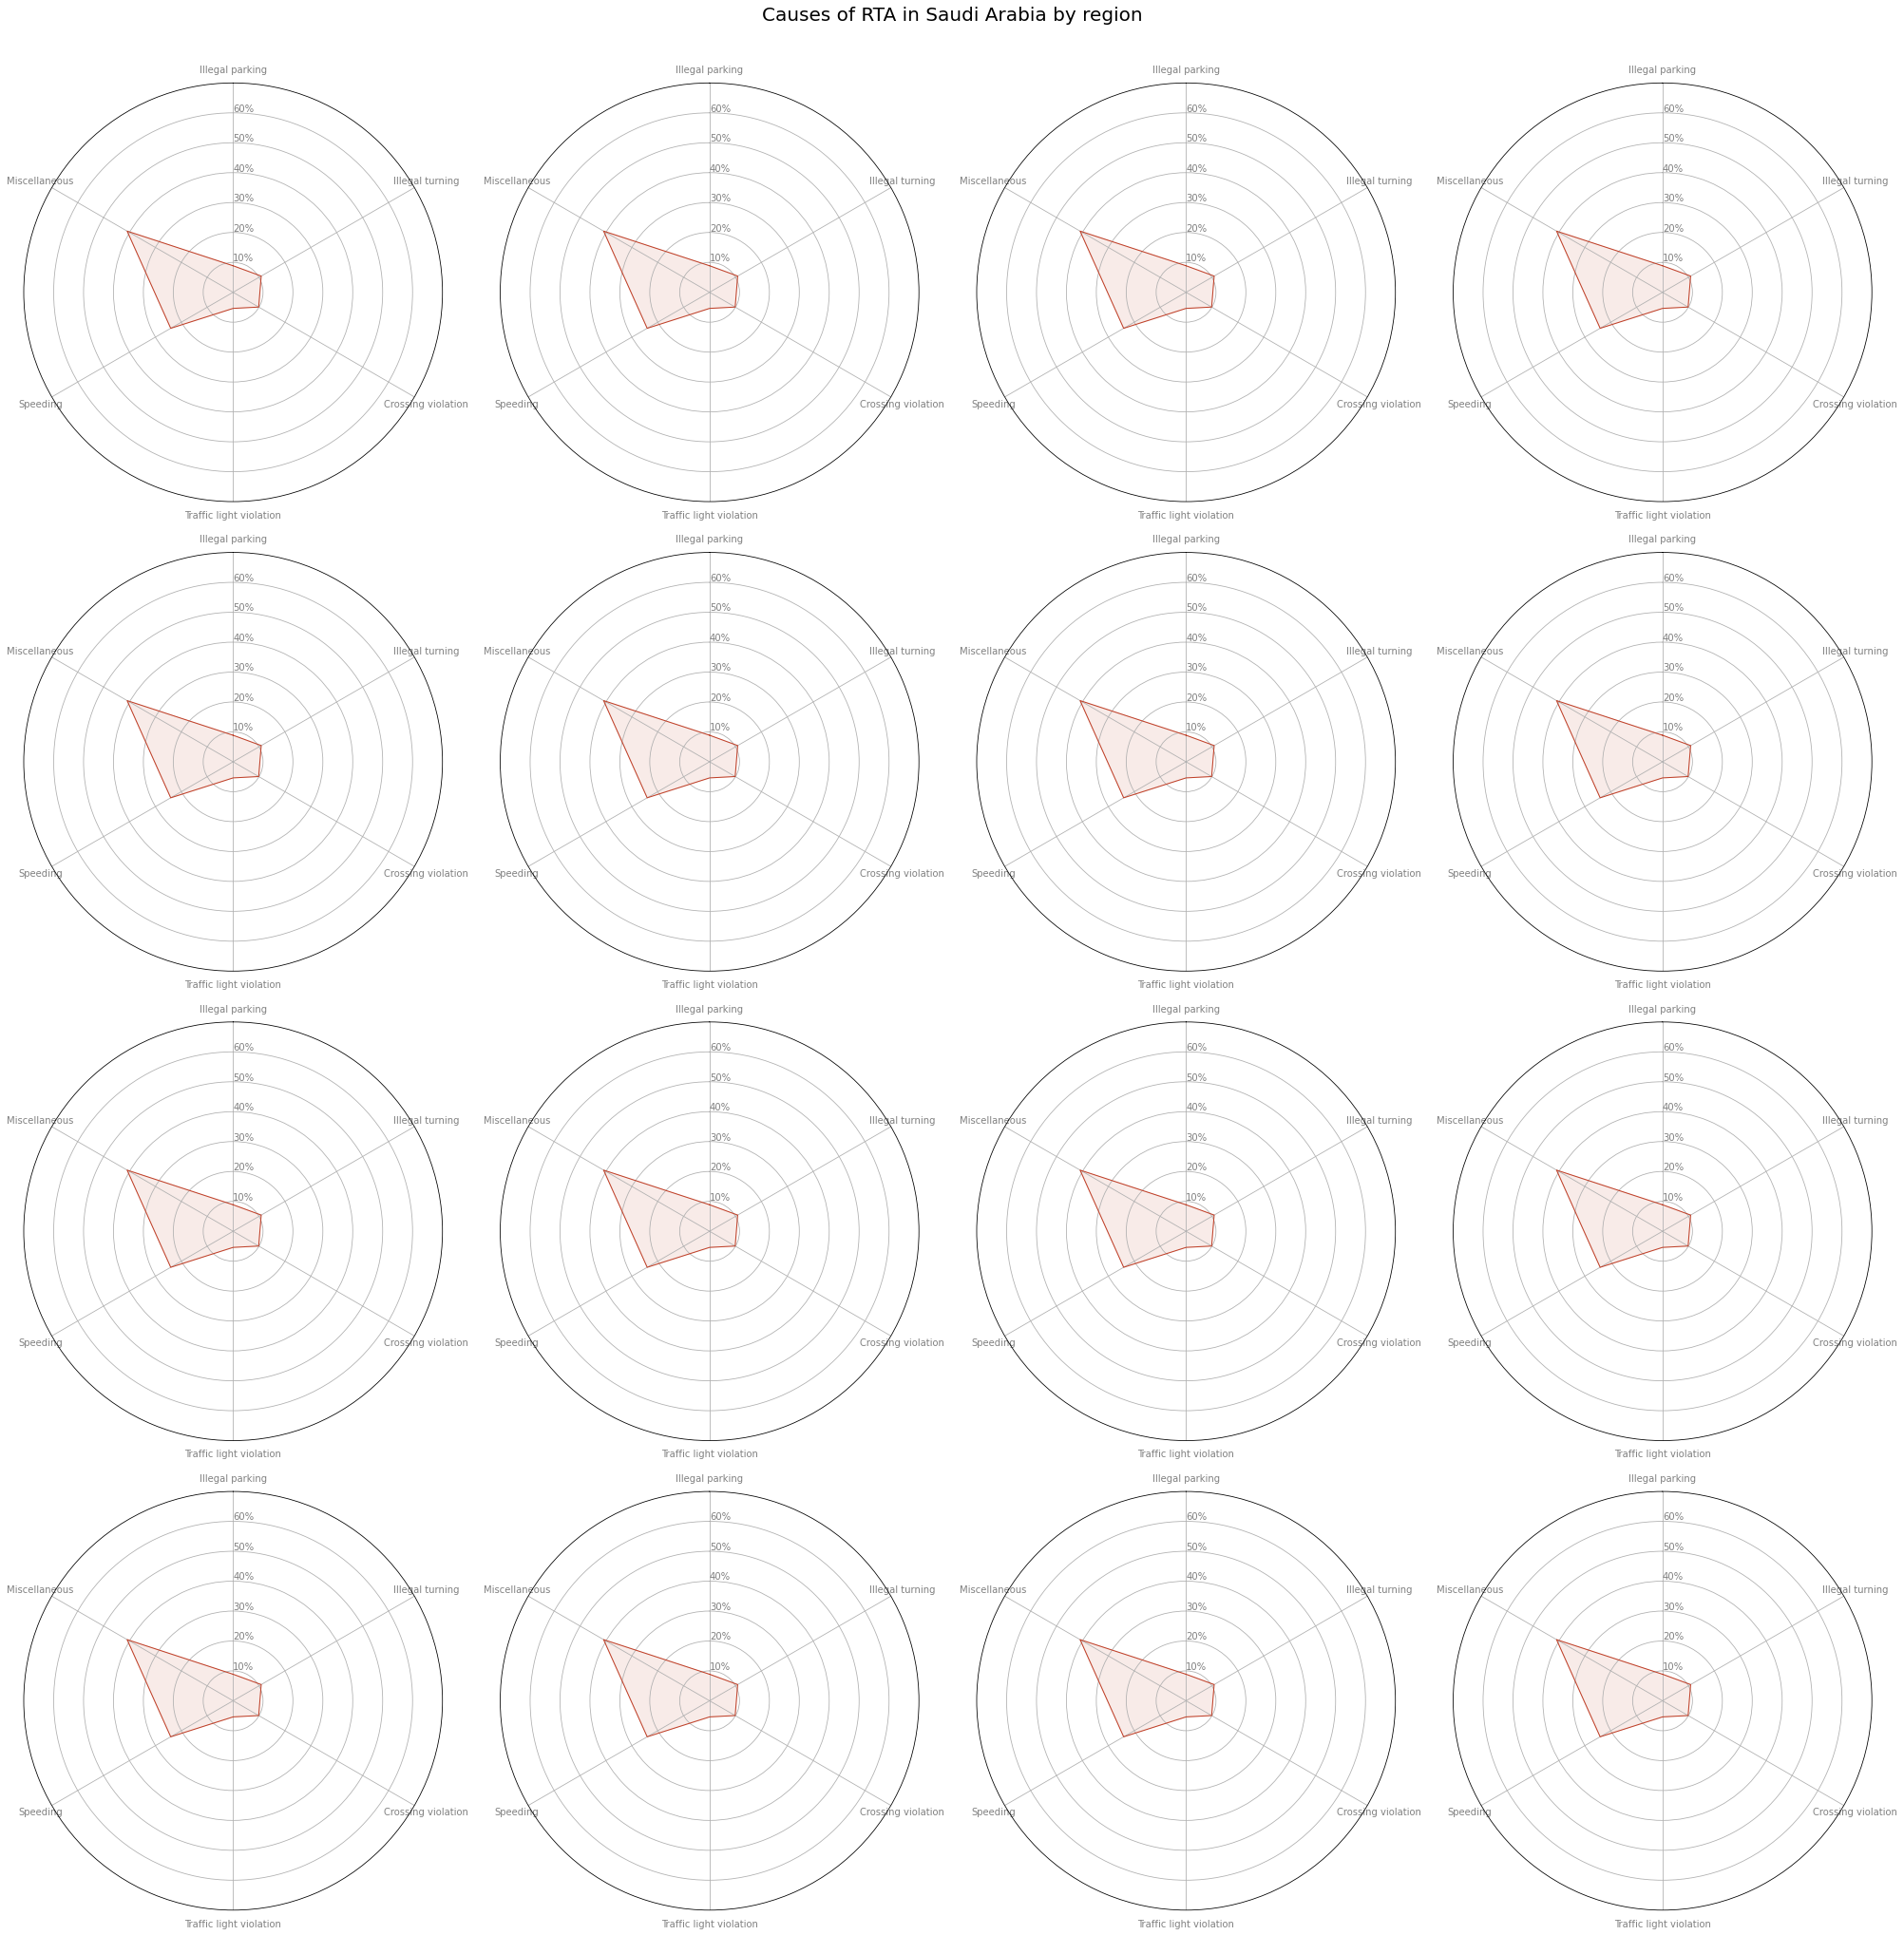

In [5]:
#preparing the dataframe
subset = df_regions[['region','cause_illegal_parking_stop',
       'cause_illegal_turn', 'cause_illegal_crossing',
       'cause_traffic_light_break', 'cause_speeding',
       'cause_other']]


colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']

def make_spider(row,title):
    #Preparing the angles of the chart

    categories=list(subset)[1:]
    N = len(categories)
    [n / float(N) * 2 * np.pi for n in range(N)]
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    #intiate the plot
    ax = plt.subplot(4,4,row+1,polar = True)

    #this step is to start the first axis at an angle of 0
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)


    #setting up xticks
    plt.xticks(angles[:-1], ['Illegal parking', 'Illegal turning', 'Crossing violation',
                            'Traffic light violation','Speeding','Miscellaneous'], color='grey', size = 10)

    #setting the yticks
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6], ["10%","20%","30%","40%","50%","60%"], color="grey", size=10)
    plt.ylim(0,0.7)
    
    
    #plot the city
    values = (subset.loc[row].drop('region').values/(subset.loc[row].drop('region').values.sum())).flatten().tolist()
    values += values[:1]
    
    #ax.plot(angles, values, linewidth=1, linestyle='solid', color = colors[0], label = 'Region')
    #ax.fill(angles, values, color = colors[0], alpha=0.1)
    #plt.title(label = title, size = 18, loc='left',va = 'top')

    #plot the national average
    values = (subset.sum().drop('region').values/(subset.sum().drop('region').values.sum())).flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Natoinal average', color = colors[-1])
    ax.fill(angles, values, color = colors[-1], alpha=0.1)
    
    #add the legend
    #ax.legend(ncol = 1, loc = 2, bbox_to_anchor=(-.02, 0.95, 1.0, .102))


plt.figure(figsize=(28,28),facecolor='w')
plt.suptitle('Causes of RTA in Saudi Arabia by region', fontsize=20, y = 1.01)


for row in range(0,len(subset.index)):
    make_spider(row=row, title = subset['region'][row])


plt.tight_layout(pad = 1)
#plt.savefig('./output/new_national_Causes of RTA_with title.jpg', dpi = 300)